# The Sparks Foundation 

# Data Science And Business Analytics Internship (May - 2022)

# Author : Manogna Nalluri

# Task 5: Exploratory Data Analysis - Sports ( Indian Premier League ) 

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.shape

(756, 18)

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
matches.describe()


,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
matches.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [8]:
matches.isnull().sum()


id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
deliveries.shape


(179078, 21)

In [11]:
deliveries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [12]:
deliveries.describe()


,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [13]:
deliveries.nunique()


match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

In [14]:
deliveries.isnull().sum()


match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

# Now, we will merge the 2 datasets for better insights from datasets


In [15]:
#merging the 2 datasets
df = pd.merge(deliveries, matches, left_on='match_id', right_on='id')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [16]:
df.describe()


,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


# Data Visualizing

# Number of matches played in each season


Text(0, 0.5, 'Number of matches')

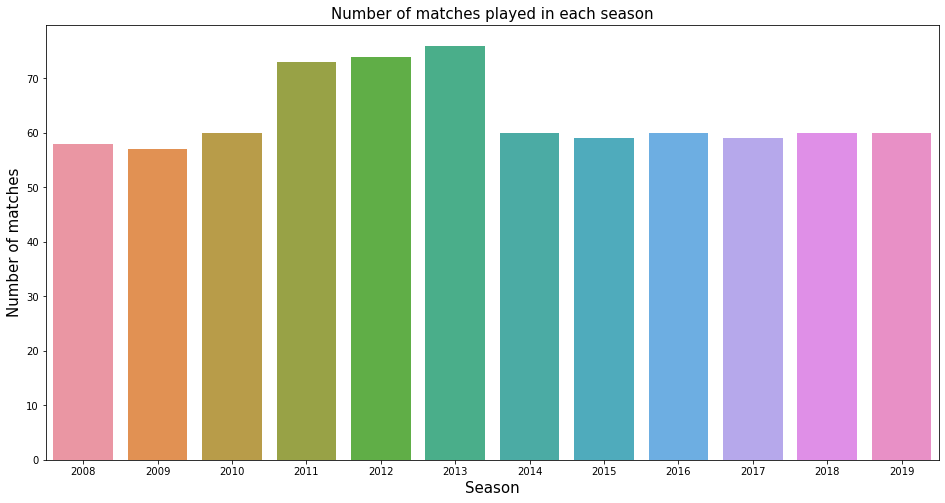

In [17]:
plt.figure(figsize=(16,8))
sns.countplot(x='season', data=matches)
plt.title('Number of matches played in each season', fontsize=15)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Number of matches', fontsize=15)

from the above plot we can say that

Season held in 2011, 2012, 2013 have more matches than other seasons.
Season held in 2011, 2012, 2013 have more than 70 matches.
All other seasons have 58-60 matches.

Text(0, 0.5, 'Number of Team')

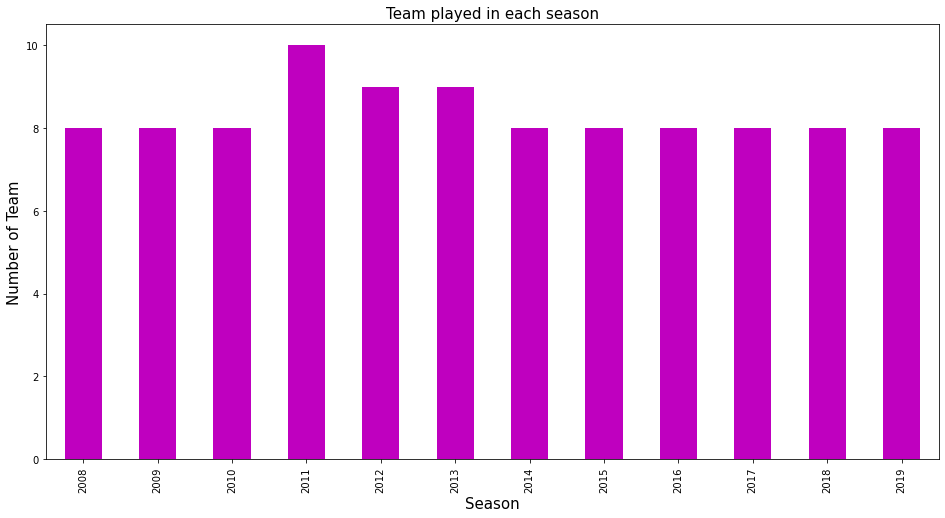

In [18]:
plt.figure(figsize=(16,8))
matches.groupby('season')['team1'].nunique().plot(kind='bar', color='m')
plt.title('Team played in each season', fontsize=15)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Number of Team', fontsize=15)

1. 10 teams played in season 2011
2. 9 teams played in seasons 2012 and 2013
3. 8 teams played in all other seasons

Text(0, 0.5, 'Number of matches')

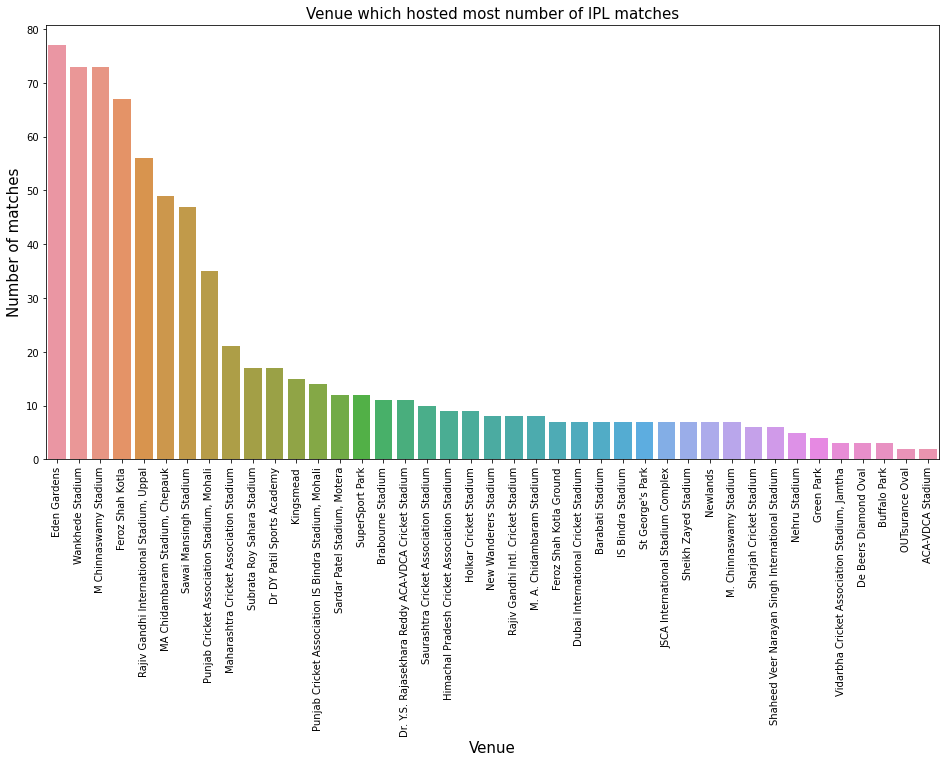

In [19]:
plt.figure(figsize=(16,8))
sns.countplot(x='venue',data=matches ,order=df['venue'].value_counts().index)
plt.title('Venue which hosted most number of IPL matches', fontsize=15)
plt.xlabel('Venue', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Number of matches', fontsize=15) 

Eden Gareden of Kolkalta hosted maximum number of matches.

Most winning team 

In [20]:
winning_teams = matches[['season','winner']]
winner_team ={}
for i in sorted(winning_teams.season.unique()):
    winner_team[i] = winning_teams[winning_teams.season ==i]['winner'].tail(1).values[0]
    
winner_IPL = pd.Series(winner_team)
winner_IPL = pd.DataFrame(winner_IPL, columns=['winner team'])
print("Season-wise Winner",winner_IPL)


Season-wise Winner                 winner team
2008       Rajasthan Royals
2009        Deccan Chargers
2010    Chennai Super Kings
2011    Chennai Super Kings
2012  Kolkata Knight Riders
2013         Mumbai Indians
2014  Kolkata Knight Riders
2015         Mumbai Indians
2016    Sunrisers Hyderabad
2017         Mumbai Indians
2018    Chennai Super Kings
2019         Mumbai Indians


Text(0, 0.5, 'Number of seasons')

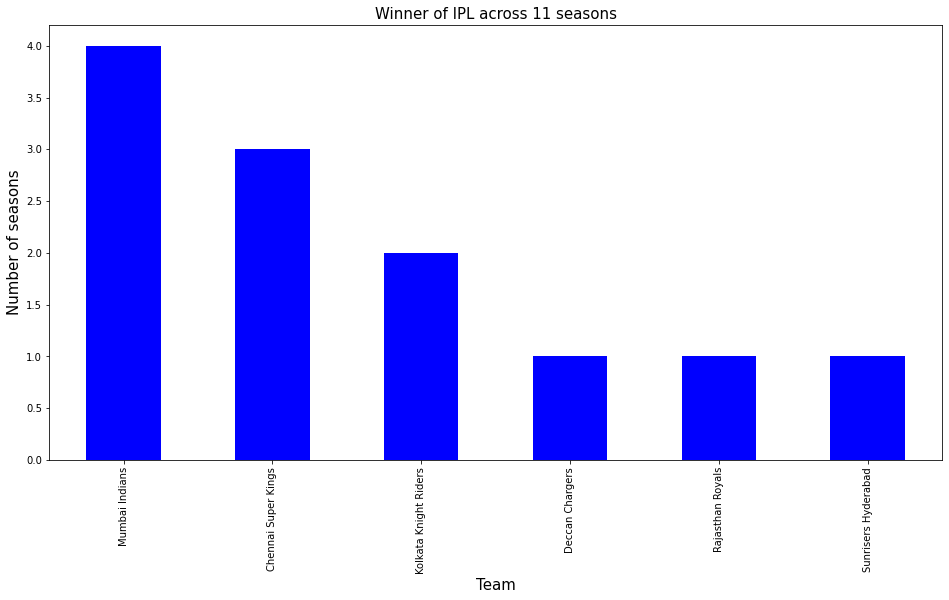

In [21]:
plt.figure(figsize=(16,8))
winner_IPL['winner team'].value_counts().plot(kind='bar', color='b')
plt.title('Winner of IPL across 11 seasons', fontsize=15)
plt.xlabel('Team', fontsize=15)
plt.ylabel('Number of seasons', fontsize=15)

1. Mumbai Indians have won 4 times
2. Chennai Super Kings have won 3 times
3. kolkata knight riders have won 2 times
4. Rajasthan Royals, Sunrises Hyderabad and Deccan Chargers have won 1 time

# Toss Decision

Text(0.5, 1.0, 'Decision taken by captain after winning toss')

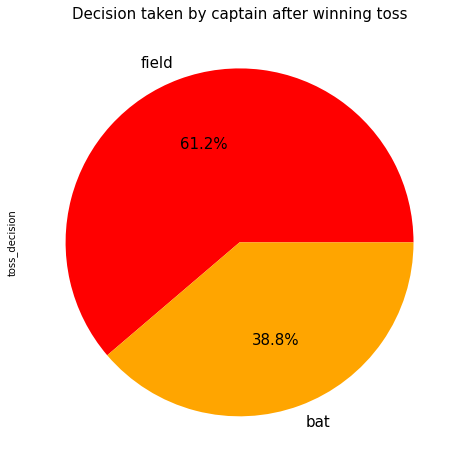

In [22]:
plt.figure(figsize=(16,8))
(matches['toss_decision'].value_counts()).plot(kind='pie',autopct = '%1.1f%%', colors=['r','orange'], fontsize=15)
plt.title('Decision taken by captain after winning toss', fontsize=15) 

Most of times team choose to field after winning the toss

Toss decision affecting winning

Text(0, 0.5, 'Frequency')

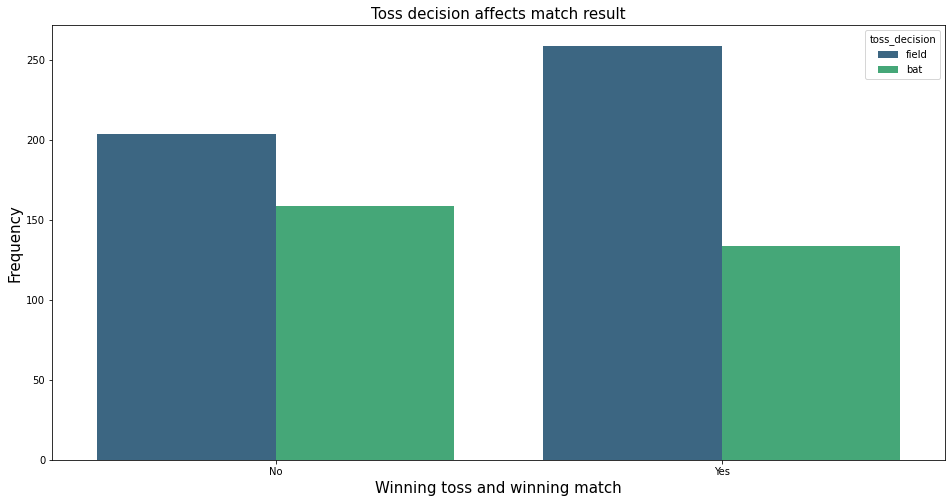

In [23]:
matches['tosswin_matchwin'] = np.where((matches.toss_winner == matches.winner), 'Yes','No')

plt.figure(figsize=(16,8))
sns.countplot(x='tosswin_matchwin',data = matches, hue='toss_decision', palette='viridis')
plt.title('Toss decision affects match result', fontsize=15)
plt.xlabel('Winning toss and winning match', fontsize=15)
plt.ylabel('Frequency', fontsize=15) 

# Individual team toss decision after winning toss 

Text(0, 0.5, 'Frequency')

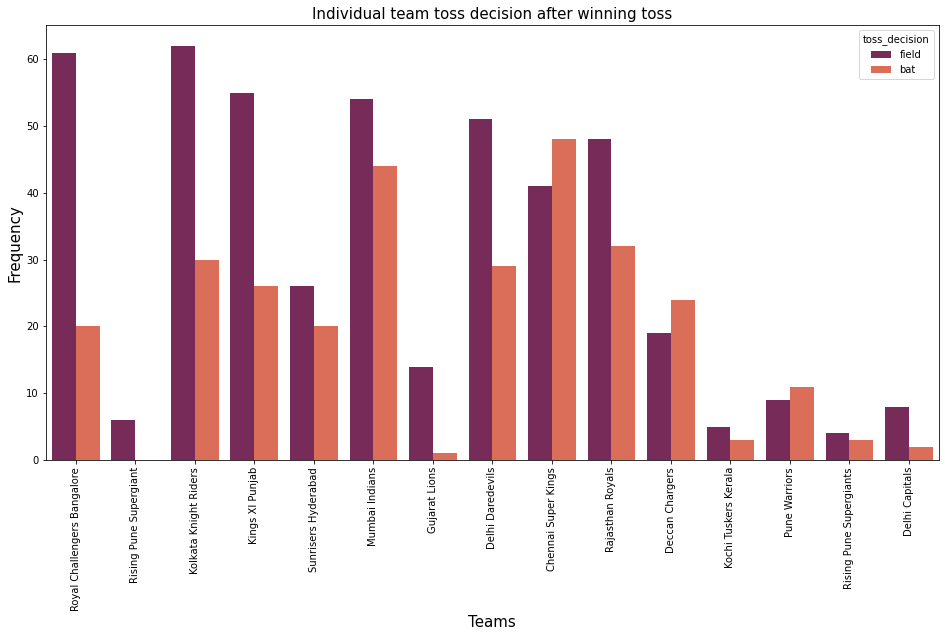

In [24]:
plt.figure(figsize=(16,8))
sns.countplot(x='toss_winner',data = matches, hue='toss_decision', palette='rocket')
plt.title('Individual team toss decision after winning toss', fontsize=15)
plt.xlabel('Teams', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Frequency', fontsize=15) 

Most teams field first after winning the toss except chennai supur kings, who has mostly choosed bat first. 

Top players with most man of the match 

Text(0, 0.5, 'Frequency')

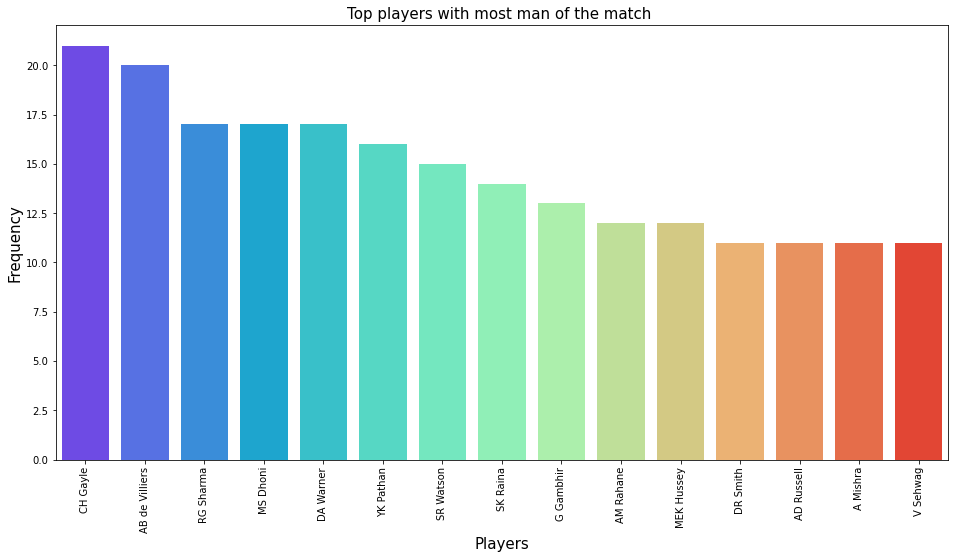

In [25]:
plt.figure(figsize=(16,8))
sns.countplot(x='player_of_match' ,data = matches, order=df['player_of_match'].value_counts().head(15).index, palette='rainbow')
plt.title('Top players with most man of the match ', fontsize=15)
plt.xlabel('Players', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Frequency', fontsize=15)

Chris Gayle has so far won the maximum man of the match awards followed by AB de Villers 

Top run getters of IPL 

Text(0, 0.5, 'Total runs scored')

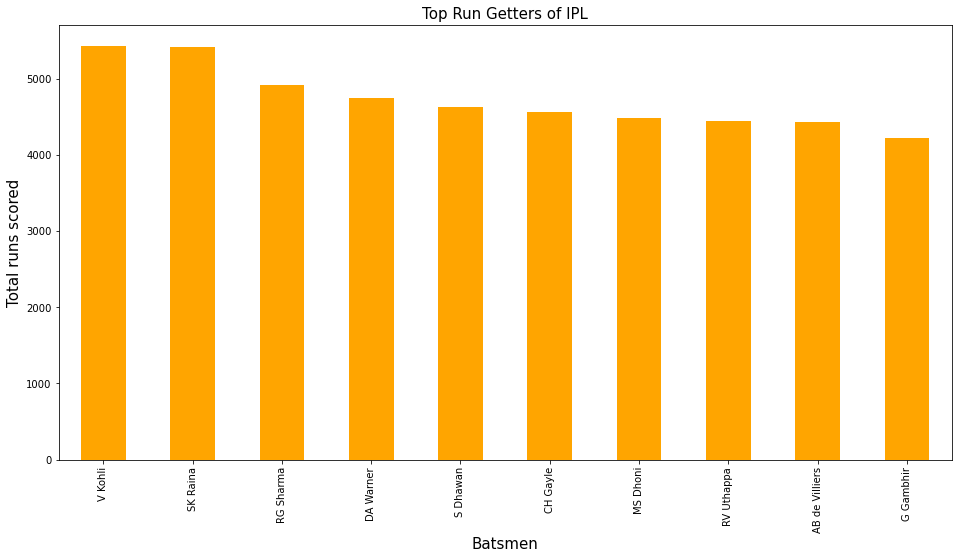

In [26]:
#using merged dataset (mathces and deliveries)
df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(16,8), color='orange')
plt.title('Top Run Getters of IPL', fontsize=15)
plt.xlabel('Batsmen', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Total runs scored', fontsize=15)


Most of top run getters are either openers or 3rd, 4th positions to bat 

Most consistent batsman of IPL 

<AxesSubplot:>

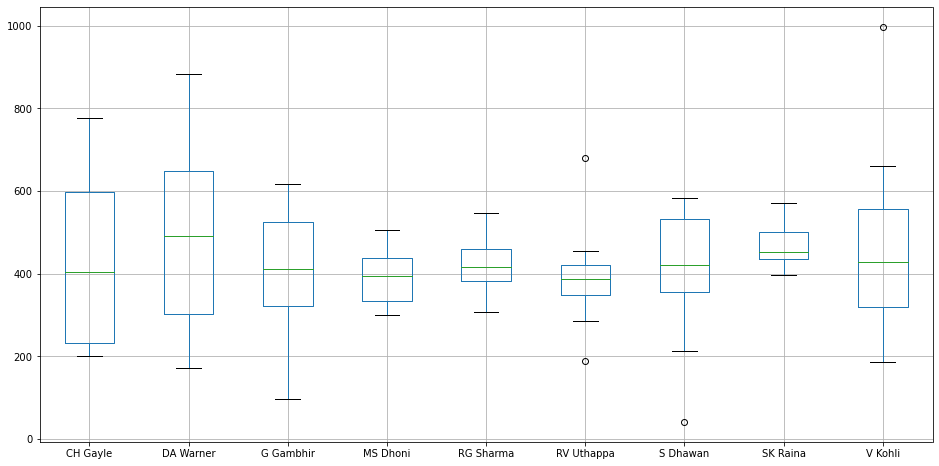

In [27]:
cons_batsman = df[df.batsman.isin(['V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner', 'S Dhawan','CH Gayle','MS Dhoni',
                                         'RV Uthappa', 'AB de Villers', 'G Gambhir'])]
[['batsman', 'season', 'total_runs']]

cons_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind='box', figsize=(16,8), grid='-')

Considering the highest and lowest season totals and spread of runs, It seems Raina has been most consistent among all. 

Top wicket takers of IPL 

Text(0, 0.5, 'Total Wicket Taken')

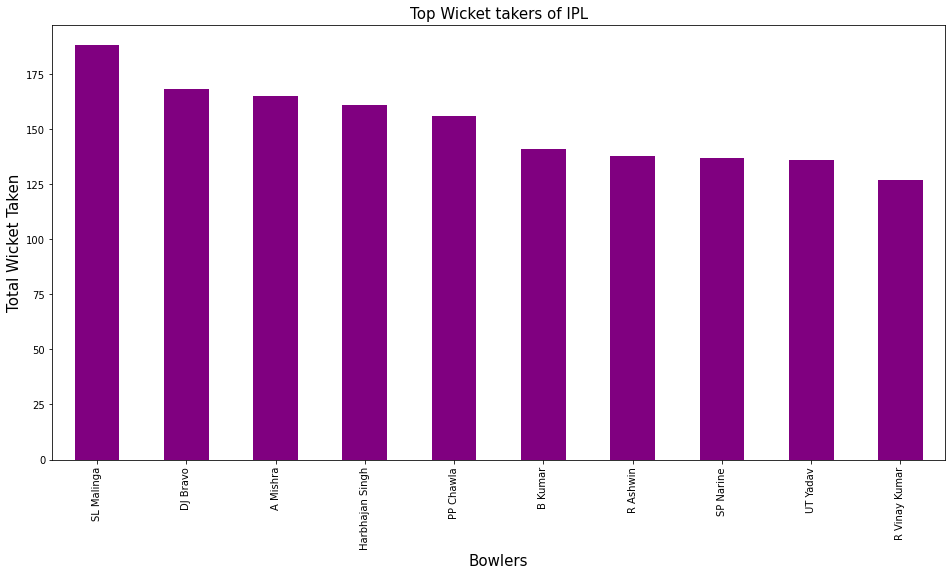

In [28]:
df.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(16,8), color='purple')
plt.title('Top Wicket takers of IPL', fontsize=15)
plt.xlabel('Bowlers', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Total Wicket Taken', fontsize=15)


# Types of Dismissal in all seasons of IPL 

In [29]:
deliveries.dismissal_kind.value_counts() 

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

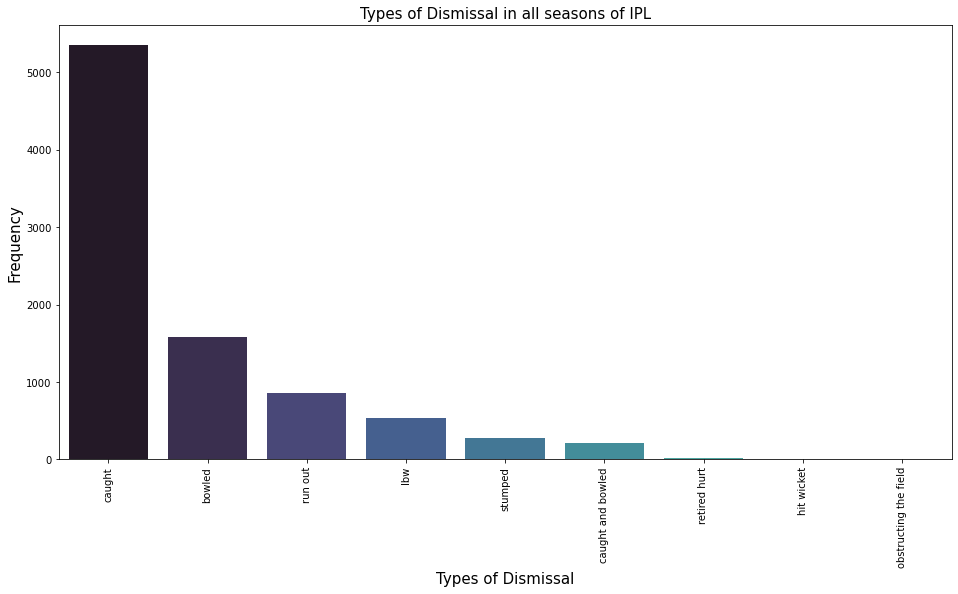

In [30]:
plt.figure(figsize=(16,8))
dismissal_type = deliveries.dismissal_kind.value_counts()
sns.barplot(x = dismissal_type.index, y = dismissal_type,palette="mako")
plt.title('Types of Dismissal in all seasons of IPL', fontsize=15)
plt.xlabel('Types of Dismissal', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Frequency', fontsize=15)
plt.show()                            

Caught is the most dismissal in the all seasons of IPL 

# Best strike rate of batsman over the year 

In [31]:
#we will consider batsmen, which played most of the seasons
no_of_balls = pd.DataFrame(df.groupby('batsman')['ball'].count()) 
runs = pd.DataFrame(df.groupby('batsman')['batsman_runs'].sum())
seasons = pd.DataFrame(df.groupby('batsman')['season'].nunique())

strike_rate = pd.DataFrame({'balls':no_of_balls['ball'], 'run':runs['batsman_runs'], 'season':seasons['season']})
strike_rate.reset_index(inplace = True)
strike_rate['strike_rate'] = (strike_rate['run']/strike_rate['balls'])*100
highest_strike_rate = strike_rate[strike_rate.season.isin([9,10,11])][['season','batsman','strike_rate']].sort_values(by='strike_rate',ascending = False)
highest_strike_rate.head() 

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
188,9,JA Morkel,136.938202


In [32]:
plt.figure(figsize=(16,8))
sns.barplot(x='batsman', y='strike_rate', data=highest_strike_rate.head(10), hue='season')
plt.title('Highest Strike rate player of IPL', fontsize=15)
plt.xlabel('Player', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Strike Rate', fontsize=15)   `                

SyntaxError: invalid syntax (<ipython-input-32-5fd6e3e9d5e4>, line 6)

Gayle and Pollard have the highest strike rates in IPL.

# Total Scoring runs over the season

In [ ]:
df.groupby('season')['batsman_runs'].sum().plot(kind='bar',figsize=(16,8), color='y' )
plt.title('Total scoring runs over the seasons of IPL', fontsize=15)
plt.xlabel('Seasons', fontsize=15)
plt.ylim(10000,22000)
plt.ylabel('Total runs', fontsize=15) 

Highest total runs in a season have scored in the season 2013 